In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
class test_data(object):
    def __init__(self):
        self.data = 0
    
    def func_inc(self):
        self.data += 1
    
class test_access(object):
    def __init__(self):
        t = test_data()
        print(t.data)
        
    def show_data(self):
        print(t.data)

In [2]:
file = open('rs1.dat', 'r')
data = file.readlines()
file.close()
data_int = [int(i) for i in data]
data_int = np.array(data_int)

In [3]:
#create basic info about dpm
info = {
    'zero_elevation' : 0., #describes the depth where we started counting
    'interval' : 0.1,    #interval of values read
    'type': ['DPL', 'DPM', 'DPH'], #type of ramsounding
    'dpm_limits' : {
        'weich' : 4,
        'breeig' : 8,
        'steif' : 14,
        'halbfest' : 28,
        'fest' : 100,
    }
}


In [4]:
#do some necessary calculations
total_depth = info['zero_elevation'] + len(data_int) * info['interval'], #depth calculation after form : total_depth = zero_elevation + (len(data_int)*0.1)

In [5]:
depth_array = np.arange(info['zero_elevation'], total_depth[0], info['interval'])
#expand depth_array to get a more nearest-neighbour like look
nn_depth_array = np.arange(info['zero_elevation'], total_depth[0], info['interval'] / 100)
nn_data_array = np.repeat(data_int,100)

In [7]:
#get transitions boundary indices for dpm_limits
#TODO: write a nice for n in info['dpm_limits] blabla loop.
#right now this is just for testing:
weich_indices  = np.where(np.logical_and(nn_data_array >= 0, nn_data_array < 4))
breiig_indices = np.where(np.logical_and(nn_data_array >= 4, nn_data_array < 8))
steif_indices  = np.where(np.logical_and(nn_data_array >= 8, nn_data_array < 14))
halbfest_indices  = np.where(np.logical_and(nn_data_array >= 14, nn_data_array < 28))
fest_indices = np.where(nn_data_array >= 28)

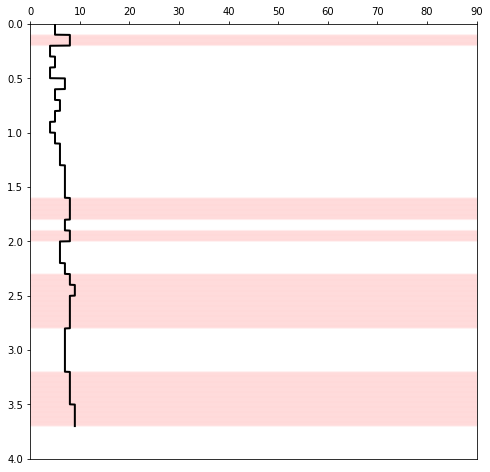

In [69]:
fig, ax = plt.subplots(1, figsize = [8,8])
ax.plot(nn_data_array, nn_depth_array, 'k', linewidth = 2)
ax.set_xlim([0,90])
ax.set_ylim(4,0)
ax.xaxis.tick_top()
for i in boundary_indices:
    ax.hlines(nn_depth_array[i], 0, 90,'r',  alpha = 0.01)

In [1]:
from tkinter import Tk,Label,Button

In [4]:
class MyFirstGUI:
    def __init__(self,master):
        self.master = master
        master.title("Manu!MANU!MAAANU!")
        self.label = Label(master, text = 'this is a test')
        self.label.pack()
        
        self.greet_button = Button(master, text="Greet", command=self.greet)
        self.greet_button.pack()

        self.close_button = Button(master, text="Close", command=master.quit)
        self.close_button.pack()
    
    def greet(self):
        print("Hello!")
    
root = Tk()
my_gui = MyFirstGUI(root)
root.mainloop()
        

NameError: name 'hello' is not defined